In [2]:
#Aikasarjaennustaminen - ei trendiä eikä kausivaihtelua
#Yksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa ei ole havaittavaa trendiä tai kausivaihtelua. Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.
#Jos ennustetaan pidemmälle kuin seuraavaan aikaleimaan, niin yksinkertainen eksoponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.
#Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.
#Huomaa, että tässä esimerkissä yksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä trendi ja kausivaihtelu, jotka malli jättää huomiotta!

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [4]:
df=pd.read_excel('http://taanila.fi/CO2.xlsx')
df.index = pd.to_datetime(df['Kuukausi'],format="%Y-%m")
df=df.drop('Kuukausi',axis=1)
df.head()

,CO2
Kuukausi,
1999-12-01,368.04
2000-01-01,369.25
2000-02-01,369.50
2000-03-01,370.56
2000-04-01,371.82


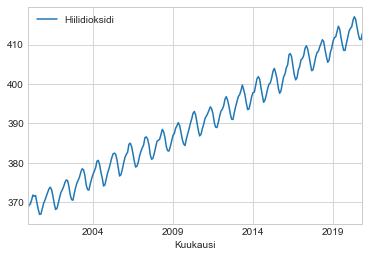

In [5]:
# Voin vaihtaa muuttujien nimiä myös rename()-toiminnolla
# Huomaa sanakirjan (dictionary) käyttö {}
df = df.rename(columns = {'CO2': 'Hiilidioksidi'})
df.plot()

In [6]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#freq-parametrille käytän arvoa 'MS', koska kyseessä ovat kuukauden 1. päivä. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Hiilidioksidi'], freq = 'MS').fit()

In [7]:
# malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues)
df['Ennuste'] = malli.fittedvalues
df

,Hiilidioksidi,Ennuste
Kuukausi,,
1999-12-01,368.04,368.040183
2000-01-01,369.25,368.040000
2000-02-01,369.50,369.250000
2000-03-01,370.56,369.500000
2000-04-01,371.82,370.560000
...,...,...
2020-07-01,414.38,416.380000
2020-08-01,412.55,414.380000
2020-09-01,411.29,412.550000


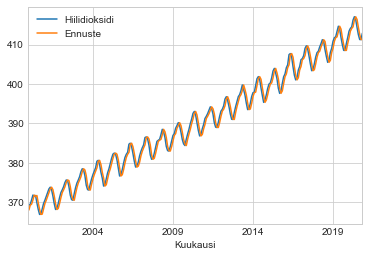

In [8]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [9]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Hiilidioksidi,Ennuste,Ennustevirhe
Kuukausi,,,
1999-12-01,368.04,368.040183,-0.000183
2000-01-01,369.25,368.040000,1.210000
2000-02-01,369.50,369.250000,0.250000
2000-03-01,370.56,369.500000,1.060000
2000-04-01,371.82,370.560000,1.260000
...,...,...,...
2020-07-01,414.38,416.380000,-2.000000
2020-08-01,412.55,414.380000,-1.830000
2020-09-01,411.29,412.550000,-1.260000


Text(0, 0.5, 'Ennustevirhe')

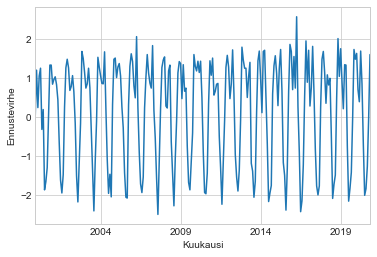

In [10]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

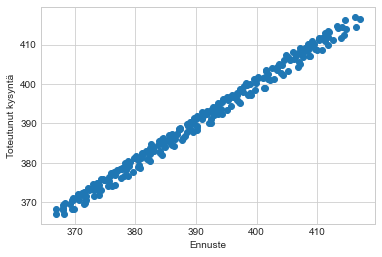

In [11]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Hiilidioksidi'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [12]:
malli.summary()

Dep. Variable:,endog,No. Observations:,252
Model:,ExponentialSmoothing,SSE,427.073
Optimized:,True,AIC,136.937
Trend:,None,BIC,143.996
Seasonal:,None,AICC,137.099
Seasonal Periods:,None,Date:,"Fri, 15 Jan 2021"
Box-Cox:,False,Time:,15:42:11
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,368.04018,l.0,True


In [13]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Hiilidioksidi,Ennuste,Ennustevirhe
Kuukausi,,,
2020-07-01,414.38,416.38,-2.00
2020-08-01,412.55,414.38,-1.83
2020-09-01,411.29,412.55,-1.26
2020-10-01,411.28,411.29,-0.01
2020-11-01,412.89,411.28,1.61


In [14]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2020-12-01', periods = 12, freq = 'MS')

# Ennusteet 12 kuukaudelle
ennusteet = malli.forecast(12)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2020-12-01,412.89
2021-01-01,412.89
2021-02-01,412.89
2021-03-01,412.89
2021-04-01,412.89
2021-05-01,412.89
2021-06-01,412.89
2021-07-01,412.89
2021-08-01,412.89
2021-09-01,412.89


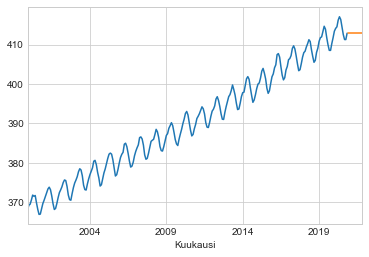

In [16]:
# Viivakaavio havainnoista
#Huomaa, että yksinkertainen eksponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.
df['Hiilidioksidi'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [17]:
df.head()

,Hiilidioksidi,Ennuste,Ennustevirhe
Kuukausi,,,
1999-12-01,368.04,368.040183,-0.000183
2000-01-01,369.25,368.040000,1.210000
2000-02-01,369.50,369.250000,0.250000
2000-03-01,370.56,369.500000,1.060000
2000-04-01,371.82,370.560000,1.260000
